# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
  
X, y = train['features'], train['labels']
X, y = shuffle(X, y)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30) #, random_state=52)

X_test, y_test = test['features'], test['labels']

In [2]:
'''
Generate more training data
'''
def generate_training_data(img_array,label_array,gen_count):
    new_train_set = []
    label_set=[]
    for i in range(gen_count):
        index = np.random.randint(1,len(img_array))
        t_img = generate_img(img_array[index],20,10,5)
        new_train_set.append(t_img)
        label_set.append(label_array[index])
    new_train_set = np.array(new_train_set).reshape((-1,32,32,3))
    label_set = np.array(label_set)
    return [new_train_set,label_set]

def generate_img(img,angle_range,shear_range,translation_range):
    '''
    this method takes the image and applies affine transformation.
    It takes the Angle of rotation, shear and translation.
    '''

    #Translation : M – 2*3 transformation matrix.
    tr_x = translation_range*np.random.uniform()-translation_range/2
    tr_y = translation_range*np.random.uniform()-translation_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    #Lets get the rotation : M – 2*3 transformation matrix.
    rotation_angle = np.random.uniform(angle_range)-angle_range/2   
    rows,cols,ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),rotation_angle,1)

    # Shear : M – 2*3 transformation matrix.
    # Inputs: Coordinates of triangle vertices in the source image.
    # Output (Shear_M) is the Coordinates of the corresponding triangle vertices in the destination image.
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    Shear_M = cv2.getAffineTransform(pts1,pts2)
      
    return perform_transform(img,Rot_M,Shear_M,Trans_M)

def perform_transform(img,Rot_M,Shear_M,Trans_M):
    rows,cols,ch = img.shape 
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Shear_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    return img

data_augment = generate_training_data(X_train,y_train,30000)
X_train = np.concatenate((X_train,data_augment[0] ), axis=0)
y_train = np.concatenate((y_train,data_augment[1] ), axis=0)
X_train, y_train = shuffle(X_train, y_train)
# plt.subplot(1,2,2)
# plt.imshow(X_train[len(X_train)-30].squeeze(),cmap='gray')

In [3]:
def to_gray(img_array):
    grays = []
    for i in range(len(img_array)):
        grays.append(cv2.cvtColor(img_array[i], cv2.COLOR_RGB2GRAY))
    grays = np.array(grays).reshape((-1,32,32,1))
    return grays

#X_train = to_gray(X_train)
#X_validation = to_gray(X_validation)
#X_test = to_gray(X_test)

img_depth = 3  # 1 for gray , 3 for rgb

In [4]:
#Normalizing the data

X_train = X_train - np.mean(X_train, axis = 0) # zero-center
X_train = X_train/np.std(X_train, axis = 0) # normalize

X_validation = X_validation - np.mean(X_validation, axis = 0) # zero-center
X_validation = X_validation/np.std(X_validation, axis = 0) # normalize

X_test = X_test - np.mean(X_test, axis = 0) # zero-center
X_test = X_test/np.std(X_test, axis = 0) # normalize

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = X_train.shape[0]

n_validation = X_validation.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 57446
Number of validation examples = 11763
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


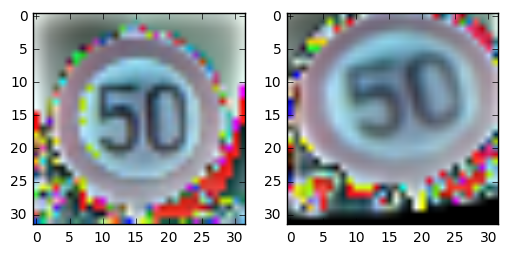

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = np.random.randint(1,len(X_train))
print(y_train[index])
#plt.figure(figsize=(1,1))
plt.subplot(1,2,1)
plt.imshow(X_train[index].squeeze(),cmap='gray')
plt.subplot(1,2,2)
sam = generate_img(X_train[index],10,10,10)
plt.imshow(sam.squeeze(),cmap='gray')    

Sample test images: 100%|██████████| 43/43 [00:13<00:00,  3.26labels/s]


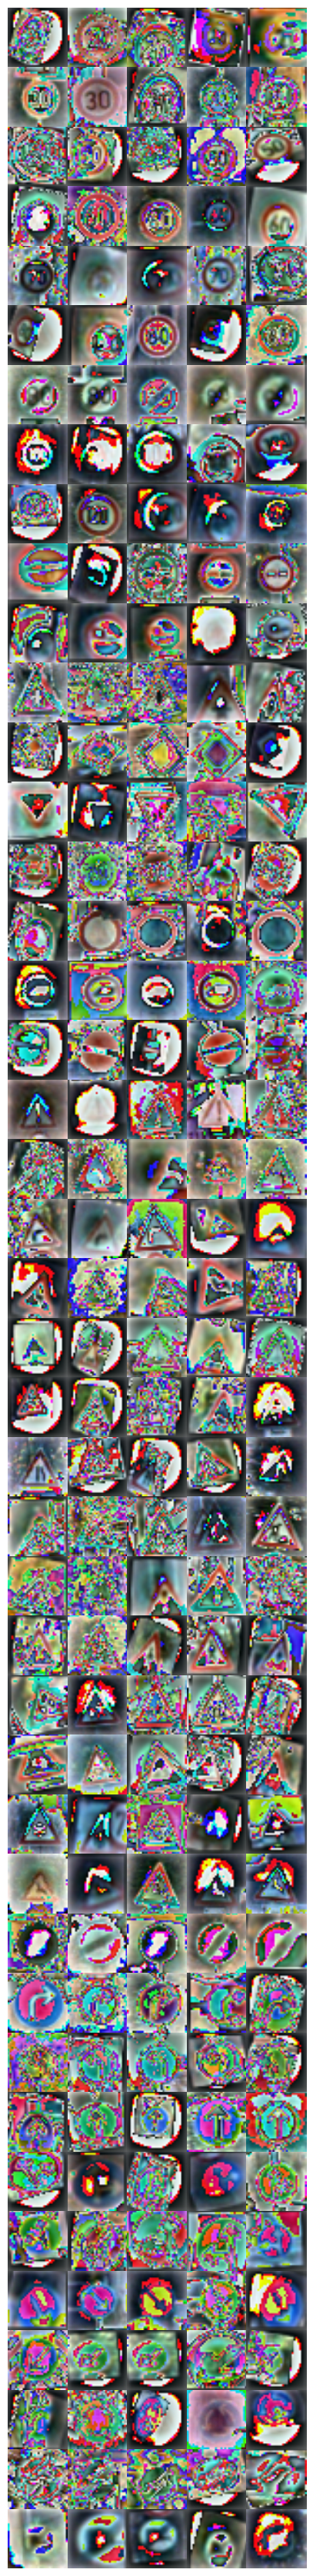

In [7]:
import matplotlib.gridspec as gridspec
from tqdm import tqdm

sample_size = 5 #five images per class label
n_labels = 43
count = 0 #book keeping for plots
fig = plt.figure(figsize=(sample_size, n_labels))
grid = gridspec.GridSpec(n_labels, sample_size, wspace=0.0, hspace=0.0)
label_progress = tqdm(range(n_labels), desc='Sample test images', unit='labels')
for i in label_progress:
    ind = y_train == i
    subset_x = X_train[ind,] #get all images that belong to class i
    for x in range(sample_size):
        img = random.choice(subset_x) #randomly pick on image from class i
        ax = plt.Subplot(fig, grid[count])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap='gray')
        fig.add_subplot(ax)
        count +=1
    # hide the borders
    if i == (n_labels-1):
        all_axes = fig.get_axes()
        for ax in all_axes:
            for sp in ax.spines.values():
                sp.set_visible(False)
plt.show()        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
import tensorflow as tf

# Hyperparameters
mu = 0
sigma = 0.1

from tensorflow.contrib.layers import flatten

depth = {
    'layer1':6,
    'layer2':16,
    'layer3':120,
    'layer4':84,
    'layer5':n_classes
}

weights  = {
    'layer1':tf.Variable(tf.truncated_normal([5,5,img_depth,depth['layer1']],dtype=np.float32,mean=mu,stddev=sigma)),
    'layer2':tf.Variable(tf.truncated_normal([5,5,depth['layer1'],depth['layer2']],dtype=np.float32,mean=mu,stddev=sigma)),
    'layer3':tf.Variable(tf.truncated_normal([5*5*16,depth['layer3']],dtype=np.float32,mean=mu,stddev=sigma)),
    'layer4':tf.Variable(tf.truncated_normal([depth['layer3'],depth['layer4']],dtype=np.float32,mean=mu,stddev=sigma)),
    'layer5':tf.Variable(tf.truncated_normal([depth['layer4'],depth['layer5']],dtype=np.float32,mean=mu,stddev=sigma))
}

biases = {
    'layer1':tf.Variable(tf.zeros([depth['layer1']],dtype=np.float32)),
    'layer2':tf.Variable(tf.zeros([depth['layer2']],dtype=np.float32)),
    'layer3':tf.Variable(tf.zeros([depth['layer3']],dtype=np.float32)),
    'layer4':tf.Variable(tf.zeros([depth['layer4']],dtype=np.float32)),
    'layer5':tf.Variable(tf.zeros([depth['layer5']],dtype=np.float32))
}

def convnet(i,W,s,b):
    cn = tf.nn.conv2d(i,W,strides=s,padding='VALID')
    cn = tf.nn.bias_add(cn,b)
    return tf.nn.relu(cn)
    

def LeNet(x):    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    cn = convnet(x,weights['layer1'],[1,1,1,1],biases['layer1'])
    # Activation is relu -- See convnet()
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    cn = tf.nn.max_pool(cn,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #cn = tf.nn.dropout(cn, keep_prob)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    cn = convnet(cn,weights['layer2'],[1,1,1,1],biases['layer2'])
       
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    cn = tf.nn.max_pool(cn,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    
    # Flatten. Input = 5x5x16. Output = 400.
    cn = tf.reshape(cn,[-1, weights['layer3'].get_shape().as_list()[0]])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    cn = tf.add(tf.matmul(cn,weights['layer3']),biases['layer3'])
    
    # Activation.
    cn = tf.nn.relu(cn)

    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    cn = tf.add(tf.matmul(cn,weights['layer4']),biases['layer4'])
   
    # Activation.
    cn = tf.nn.relu(cn)
        
    cn = tf.nn.dropout(cn, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(cn,weights['layer5']),biases['layer5'])
    
    return logits

In [9]:
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 128
dropout = 0.5

x = tf.placeholder(tf.float32, (None, 32, 32, img_depth))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [10]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [11]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:dropout})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saved_path = saver.save(sess, 'traffic_lenet.model')
    print("Model saved "+saved_path)

Training...

EPOCH 1 ...
Validation Accuracy = 0.706

EPOCH 2 ...
Validation Accuracy = 0.829

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.905

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.920

EPOCH 7 ...
Validation Accuracy = 0.922

EPOCH 8 ...
Validation Accuracy = 0.938

EPOCH 9 ...
Validation Accuracy = 0.935

EPOCH 10 ...
Validation Accuracy = 0.939

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.947

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.948

EPOCH 15 ...
Validation Accuracy = 0.953

EPOCH 16 ...
Validation Accuracy = 0.946

EPOCH 17 ...
Validation Accuracy = 0.947

EPOCH 18 ...
Validation Accuracy = 0.952

EPOCH 19 ...
Validation Accuracy = 0.960

EPOCH 20 ...
Validation Accuracy = 0.955

EPOCH 21 ...
Validation Accuracy = 0.949

EPOCH 22 ...
Validation Accuracy = 0.951

EPOCH 23 ...
Validation Accuracy = 0.950

EPOCH 24 ...
Validation Accura

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

DataSet: 
I have used the pre-processed German Traffic Sign data set, which has been resized the images to 32*32. 
The pre-processed data set already provided the Training and Test Set separately.

Train-Validation Split:
I divided the training data into Training (70%) and Validation Set (30%). I have randomly selected 30% from the 
training set to create the validation set. 
I used the sklearn’s train_test_split method to perform this task.

Data Generation:
I have also generated 30,000 more data (images) by affine transformation method and added it to the training set. The
method involves selecting random images from the training data and applying transforms to it such as shear, rotation and translations.

Final Data Set Counts
Training: 27446+30000 = 57446
Validation: 11763

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Gray scale/RGB:
I have tested with Gray Scale (channel 1) and RGB (channel 3). In final model I had used RGB, since gray did not provide any significant improvement. 

Normalization
Normalizing was used on the data set since helps gain better relationship. Score improved slightly with normalization.
X_train = X_train - np.mean(X_train, axis = 0) # zero-center
X_train = X_train/np.std(X_train, axis = 0) # normalize

X_validation = X_validation - np.mean(X_validation, axis = 0) # zero-center
X_validation = X_validation/np.std(X_validation, axis = 0) # normalize

Data/image preparation/pre-processing is a critical part of the machine learning. In this project some of the standardization of the imges (like 32*32) were already done on the dataset.

Validation Set: The idea behind the validation set is for parameter selection and to avoid overfitting. If model is trained on a training set only, it is very likely to get 100% accuracy and overfit, thus get very poor performance on test set. Hence a validation set, which is independent from the training set is used.

More the training data, better the model. I have generated some 30000 more data by affine transformation on the training dataset. It would have been possible to generate much more data but given the limited processing capacity I ran this training on, I had to settle for a modest size.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

For this project, I have used CNN model to classification images. The model is imitation of the LeNet (by Yann Lecun) architecture model with some slight variation, mainly adding dropouts and using different optimizer technique. I also have referred “A Committee of Neural Networks for Traffic Sign Classification” by “Dan Ciresan, et. al” the winning paper on the German traffic data set competitions.

My architecture primarily is uses a input layer of 32x32x3 which gets convoluted using a 5x5 filter with 16 output channel followed by a Maxpool. The ouput from maxpool 14x14x6 is again convoluted and maxpooled with output dimension as 5x5x16. This output is flatted and passed into two fully connected layer reducing the size to 120, followed by a dropout of 0.5. The output from drop out is fed into a full layer (84) which outputs the 43 – classification classes.

Optimization: Adam optimizer is known to more effective than gradient descent, mainly making larger effective step size with less tuning using moving averages of the parameters (momentum). So, I have used the Adam Optimizer with learning rate of 0.001 over gradientDescent. However, down side is more calculations and more state saved.
I have used the RELU as the activation function between layers.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Epoch: 30  I tried various epoch sizes from 10-100, but tuned it to 30, after which accuracy was flat and no improve much.

BatchSize: 128,  After trying batch size of 256,64,32, 128 was optimal and provided better accuracy. However, I have to not that there was no significant change between 64/128 sizes.

Initial Weights was created with normal distribution with mean 0 and SD – sigma 0.1. Intial Bias was all set to zero.
(see answer to question 5 as well for more details)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I have used convolutional neural network (LeNet) to classify this dataset. ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward propagation efficient by using shared weights and hence reduce the amount of parameters in the network. ConvNet unlike NN takes in the 3 dimension i.e. depth, making it more suitable for image classification. 

ConvNet by using filter/strides takes advantage of the spatial structure of data which is not the case in regular methods which treats input pixels which are far apart and close together on the same footing. ConvNet also functions with translation invariance, i.e. recognizing an object in an image whether it’s in left corner or center or right corner and reusing what it has learnt before (shared weights) as well.

<img src="files/cnn_archi.png"/>

Training the network involved playing around with multiple parameters and also with data processing area. On the data processing area, I tried improving accuracy by 
-	Normalizing the data
-	Using different depth (3 – rgb vs 1- gray)
-	Generate more training set
-	Creating validation set (initially 20%, then set to 30%)

Other areas of tuning involved working with hyper-parameters and model variables:
-	Epochs
-	Batch size
-	Mu,sigma (initial weights)
-	Learning rate
-	Drop Out probability and also introducing dropout between multiple layers


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.889


In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
from scipy import ndimage

img1 = misc.imread('images/final/stop.jpg',mode='RGB')
img2 = misc.imread('images/final/70.jpg',mode='RGB')
img3 = misc.imread('images/final/do_not_enter.jpg',mode='RGB')
img4 = misc.imread('images/final/left_turn.jpg',mode='RGB')
img5 = misc.imread('images/final/road_work.jpg',mode='RGB')
img6 = misc.imread('images/final/no_bicycle.jpg',mode='RGB') #hard one 
img7 = misc.imread('images/final/left.jpg',mode='RGB') # very close US sign

my_test = np.array([img1, img2, img3, img4, img5, img6, img7])
my_label = np.array([14,4,17,34,25, 29, 34])

my_test = my_test - np.mean(my_test, axis = 0) # zero-center
my_test = my_test/np.std(my_test, axis = 0) # normalize

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(my_test, my_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.571


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer**:

I tested the model with candidate 7 images, where 5 are german signs images and 2 were US based signs (but close enough to be identified with 29,Bicycles crossing and 34,Turn left ahead). 

The Bicycle and Us-Left Ahead sign were not detected. 

Model was able to detect images only very close to the training data set, this means further improvements to the model can be made such as increase network complexity (more layers, depth, etc), increase more training data, test with normaliztion and add more regularization (more dropout or L2).

Another interesting observation is that the model failed to detect Left turn US sign which was very close to german left ahead but with different color (yellow). After reading the paper "A Committee of Neural Networks for Traffic Sign Classification" I choose to use color instead of gray scale for the model, however, after trying out the basic normaliztion, I did not get signifant gain in accuracy (I plan to revisit normalization with larger dataset) . (Note: the paper uses advance CLAHE normalization model which I plan to try out as part of further study).

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Model accuracy rate on the Test data set is 89%
Model performed at accuracy custom images at 57%.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

TopKV2(values=array([[  1.00000000e+00,   2.72689767e-18,   3.28803223e-21,
          5.35365994e-22,   2.76315433e-22],
       [  3.19059253e-01,   1.89165890e-01,   1.13709457e-01,
          7.96993822e-02,   5.89122176e-02],
       [  1.00000000e+00,   1.05445060e-16,   3.42981303e-30,
          1.50659876e-38,   0.00000000e+00],
       [  1.00000000e+00,   3.05160008e-10,   1.97592123e-10,
          1.90202316e-14,   9.81161382e-20],
       [  9.99999523e-01,   4.67280358e-07,   1.33440969e-09,
          1.52772642e-10,   1.08952847e-10],
       [  1.00000000e+00,   2.31156481e-08,   5.95032867e-09,
          4.17379820e-09,   9.02008745e-10],
       [  9.95739698e-01,   3.72068840e-03,   4.51590284e-04,
          8.68552524e-05,   1.03026468e-06]], dtype=float32), indices=array([[14, 25,  1, 17, 13],
       [ 1,  8,  2,  4, 15],
       [17, 14, 10,  9,  0],
       [34, 35, 38, 40,  3],
       [25, 20,  5, 13,  2],
       [13,  2, 10,  9,  4],
       [ 1, 40,  0, 16,  4]], dtype=in

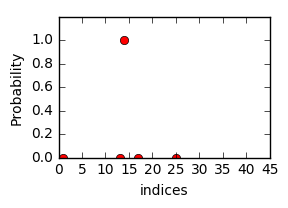

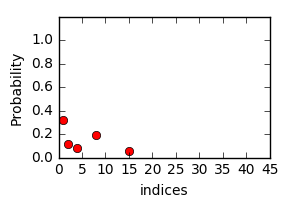

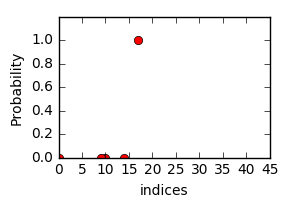

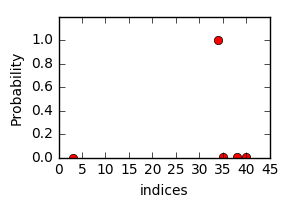

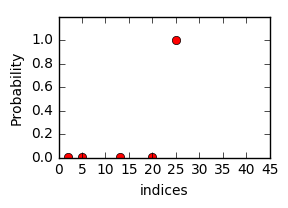

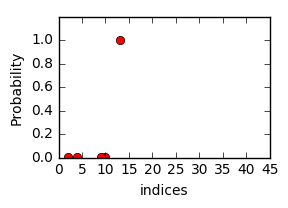

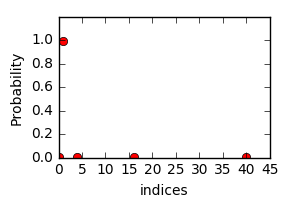

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#one_hot_my_label = tf.one_hot(my_label, n_classes)
#y_pred = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_my_label)
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = tf.nn.softmax(logits)
topFive=tf.nn.top_k(y_pred, k=5, sorted=True, name=None)

with tf.Session() as session:
    #session.run(tf.global_variables_initializer())
    saver.restore(session,tf.train.latest_checkpoint('.'))
    top5 = session.run(topFive, feed_dict={x: my_test,  keep_prob:1.0})
    print(top5)
for i in range(7):
    plt.subplot(222+1)
    plt.plot(top5[1][i],top5[0][i],'ro')
    plt.ylabel('Probability')
    plt.xlabel('indices')
    plt.axis([0,45,0,1.2])
    plt.show()

I inputed 7 images, out of which 5 where german signs and for fun 2 US traffic sign (different color and shape).

Top 5 probability and graph shows the result, in which the second input speed limit 70 gets labeled inacurrately as 'Right-of-way at the next intersection' but speed limit 70 showing up as the 2nd best on top_k. 
Of the 5 german images, 80% where accurately indentified. Overall acurracy for 7 images was 57% only.

I also added US 'No Bicycle' image sign which does not existing in the German training set, expecting it to classify it 
as '29,Bicycles crossing', but gets identified as speed 120 (may be due the wheel of the bicycle and handle), however, 
interestingly the second best result for it was do not enter sign, since the image does have a red line 
striking out the bicycle. This particular example was very helpful for me to understand how CNN 'sees' the images and classifies them. This was interesting and I plan to spend some of my free time playing with model to trani and undertand better

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.